In [ ]:
# %%capture
!pip install NeuralForecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.6/213.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer
from neuralforecast.losses.numpy import mae,mse


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

X_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/traffic/M/df_x.csv')
Y_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/traffic/M/df_y.csv')


# X_df = pd.read_csv('@datasets_reproducibity/traffic/M/df_x.csv')
# Y_df = pd.read_csv('@datasets_reproducibity/traffic/M/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...
17539,2018-07-01 21:00:00,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,-0.500000,-0.500000,-0.466667,-0.00137


In [ ]:
a=Y_df['unique_id'].unique()
a.size

862

In [ ]:
merged_df = pd.merge(Y_df, X_df[['ds', 'ex_1', 'ex_2','ex_3','ex_4']], on='ds', how='left')
merged_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,0,-0.711224,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 02:00:00,1,-0.643331,-0.413043,0.166667,-0.500000,-0.00137
2,2016-07-01 02:00:00,2,-0.925668,-0.413043,0.166667,-0.500000,-0.00137
3,2016-07-01 02:00:00,3,-1.182531,-0.413043,0.166667,-0.500000,-0.00137
4,2016-07-01 02:00:00,4,-0.569992,-0.413043,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
15122923,2018-07-02 01:00:00,857,-0.311380,-0.456522,-0.500000,-0.466667,-0.00137
15122924,2018-07-02 01:00:00,858,-2.129480,-0.456522,-0.500000,-0.466667,-0.00137
15122925,2018-07-02 01:00:00,859,-1.582374,-0.456522,-0.500000,-0.466667,-0.00137
15122926,2018-07-02 01:00:00,860,-0.555770,-0.456522,-0.500000,-0.466667,-0.00137


In [ ]:
filtered_df = merged_df[merged_df['unique_id'] == 'OT']
filtered_df.reset_index(drop=True, inplace=True)
# filtered_df.drop("ds",axis=1,inplace=True)
filtered_df['ds'] = pd.to_datetime(filtered_df['ds'])

Y_df=filtered_df
Y_df

<ipython-input-9-9b593517d244>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ds'] = pd.to_datetime(filtered_df['ds'])


,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [ ]:
Y_df['unique_id'].unique()

array(['OT'], dtype=object)

In [ ]:
Y_df.shape

(17544, 7)

## Horizon 96

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:17448,:]
Y_test_df = Y_df.iloc[17448:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,17448,2018-06-28 02:00:00,OT,-1.168850,-0.413043,0.0,0.400000,-0.012329
1,17449,2018-06-28 03:00:00,OT,-1.380019,-0.369565,0.0,0.400000,-0.012329
2,17450,2018-06-28 04:00:00,OT,-1.414263,-0.326087,0.0,0.400000,-0.012329
3,17451,2018-06-28 05:00:00,OT,-1.380019,-0.282609,0.0,0.400000,-0.012329
4,17452,2018-06-28 06:00:00,OT,-1.168850,-0.239130,0.0,0.400000,-0.012329
...,...,...,...,...,...,...,...,...
91,17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
92,17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
93,17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
94,17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-06-28 02:00:00,OT,-1.168850,-0.413043,0.0,0.400000,-0.012329
1,2018-06-28 03:00:00,OT,-1.380019,-0.369565,0.0,0.400000,-0.012329
2,2018-06-28 04:00:00,OT,-1.414263,-0.326087,0.0,0.400000,-0.012329
3,2018-06-28 05:00:00,OT,-1.380019,-0.282609,0.0,0.400000,-0.012329
4,2018-06-28 06:00:00,OT,-1.168850,-0.239130,0.0,0.400000,-0.012329
...,...,...,...,...,...,...,...
91,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
92,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
93,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
94,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
horizon = 96
model = FEDformer(h=horizon, input_size=24,
               max_steps=5,

               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEmbedding | 384   
6 | encoder       | Encoder       | 173 K 
7 | decoder       | Decoder       | 362 K 
------------------------------------------------
536 K     Trainable params
0         Non-trainable params
536 K     Total params
2.145     Total

Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=5` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,FEDformer
unique_id,,
OT,0,-0.091041
OT,1,0.029727
OT,2,-0.137520
OT,3,-0.417852
OT,4,-0.606607
...,...,...
OT,91,0.771031
OT,92,0.783591
OT,93,0.794039


<Axes: xlabel='ds'>

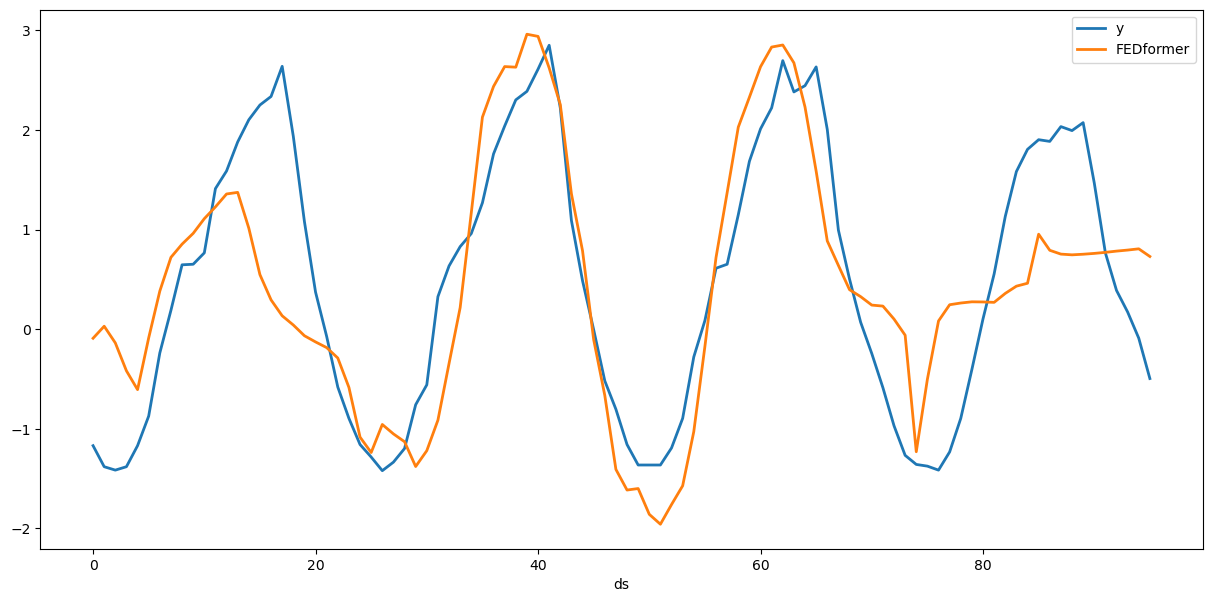

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'FEDformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,FEDformer
ds,
0,-0.091041
1,0.029727
2,-0.137520
3,-0.417852
4,-0.606607
...,...
91,0.771031
92,0.783591
93,0.794039


In [ ]:
mae_FEDformer = mae(Y_test_df['y'], forecasts['FEDformer'])
mse_FEDformer = mse(Y_test_df['y'], forecasts['FEDformer'])
print(f'FEDformer MAE: {mae_FEDformer:.3f}')
print(f'FEDformer MSE: {mse_FEDformer:.3f}')

FEDformer MAE: 0.676
FEDformer MSE: 0.695


## Horizon 192

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:17352,:]
Y_test_df = Y_df.iloc[17352:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,17352,2018-06-24 02:00:00,OT,-0.837828,-0.413043,0.5,0.266667,-0.023288
1,17353,2018-06-24 03:00:00,OT,-1.168850,-0.369565,0.5,0.266667,-0.023288
2,17354,2018-06-24 04:00:00,OT,-1.340068,-0.326087,0.5,0.266667,-0.023288
3,17355,2018-06-24 05:00:00,OT,-1.374312,-0.282609,0.5,0.266667,-0.023288
4,17356,2018-06-24 06:00:00,OT,-1.340068,-0.239130,0.5,0.266667,-0.023288
...,...,...,...,...,...,...,...,...
187,17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
188,17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
189,17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
190,17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-06-24 02:00:00,OT,-0.837828,-0.413043,0.5,0.266667,-0.023288
1,2018-06-24 03:00:00,OT,-1.168850,-0.369565,0.5,0.266667,-0.023288
2,2018-06-24 04:00:00,OT,-1.340068,-0.326087,0.5,0.266667,-0.023288
3,2018-06-24 05:00:00,OT,-1.374312,-0.282609,0.5,0.266667,-0.023288
4,2018-06-24 06:00:00,OT,-1.340068,-0.239130,0.5,0.266667,-0.023288
...,...,...,...,...,...,...,...
187,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
188,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
189,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
190,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
horizon = 192
model = FEDformer(h=horizon, input_size=24,
               max_steps=7,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEm

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=7` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,FEDformer
unique_id,,
OT,0,2.004492
OT,1,1.601618
OT,2,1.201149
OT,3,0.982627
OT,4,0.814776
...,...,...
OT,187,0.563949
OT,188,0.347511
OT,189,0.127230


<Axes: xlabel='ds'>

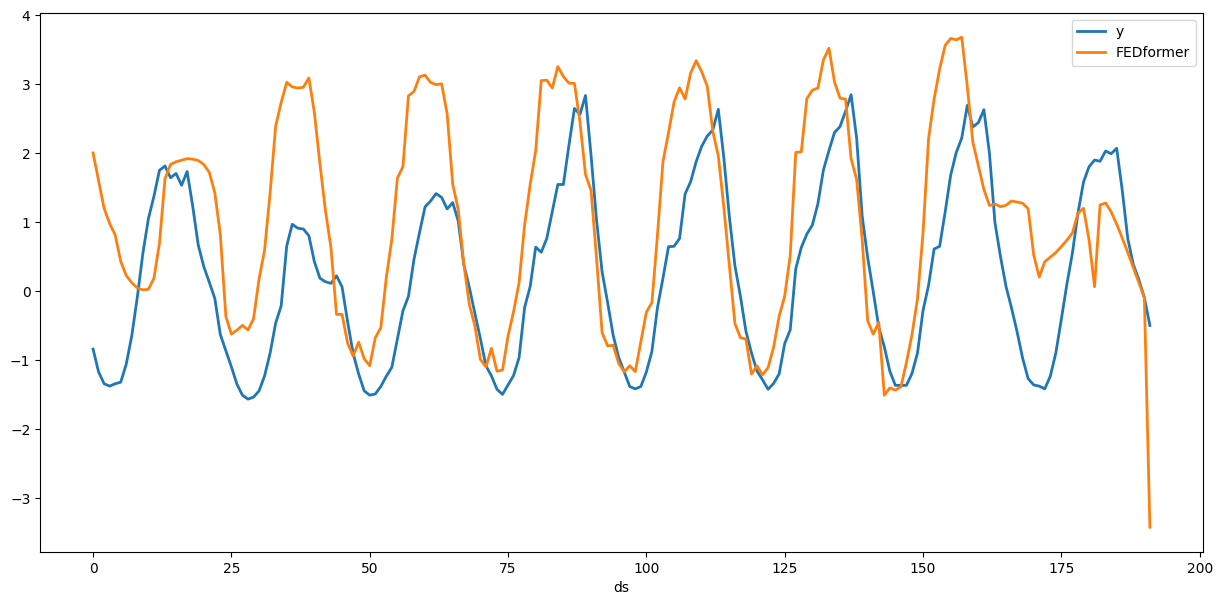

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'FEDformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,FEDformer
ds,
0,2.004492
1,1.601618
2,1.201149
3,0.982627
4,0.814776
...,...
187,0.563949
188,0.347511
189,0.127230


In [ ]:
mae_FEDformer = mae(Y_test_df['y'], forecasts['FEDformer'])
mse_FEDformer = mse(Y_test_df['y'], forecasts['FEDformer'])
print(f'FEDformer MAE: {mae_FEDformer:.3f}')
print(f'FEDformer MSE: {mse_FEDformer:.3f}')

FEDformer MAE: 1.085
FEDformer MSE: 1.787


## Horizon 336

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:17208,:]
Y_test_df = Y_df.iloc[17208:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,17208,2018-06-18 02:00:00,OT,-0.729390,-0.413043,-0.5,0.066667,-0.039726
1,17209,2018-06-18 03:00:00,OT,-1.117484,-0.369565,-0.5,0.066667,-0.039726
2,17210,2018-06-18 04:00:00,OT,-1.277288,-0.326087,-0.5,0.066667,-0.039726
3,17211,2018-06-18 05:00:00,OT,-1.402848,-0.282609,-0.5,0.066667,-0.039726
4,17212,2018-06-18 06:00:00,OT,-1.465628,-0.239130,-0.5,0.066667,-0.039726
...,...,...,...,...,...,...,...,...
331,17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
332,17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
333,17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
334,17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-06-18 02:00:00,OT,-0.729390,-0.413043,-0.5,0.066667,-0.039726
1,2018-06-18 03:00:00,OT,-1.117484,-0.369565,-0.5,0.066667,-0.039726
2,2018-06-18 04:00:00,OT,-1.277288,-0.326087,-0.5,0.066667,-0.039726
3,2018-06-18 05:00:00,OT,-1.402848,-0.282609,-0.5,0.066667,-0.039726
4,2018-06-18 06:00:00,OT,-1.465628,-0.239130,-0.5,0.066667,-0.039726
...,...,...,...,...,...,...,...
331,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
332,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
333,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
334,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [ ]:
horizon = 336
model = FEDformer(h=horizon, input_size=24,
               max_steps=12,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEm

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=12` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,FEDformer
unique_id,,
OT,0,1.054739
OT,1,1.149088
OT,2,1.121719
OT,3,0.904911
OT,4,0.457345
...,...,...
OT,331,0.576199
OT,332,0.515147
OT,333,0.460186


<Axes: xlabel='ds'>

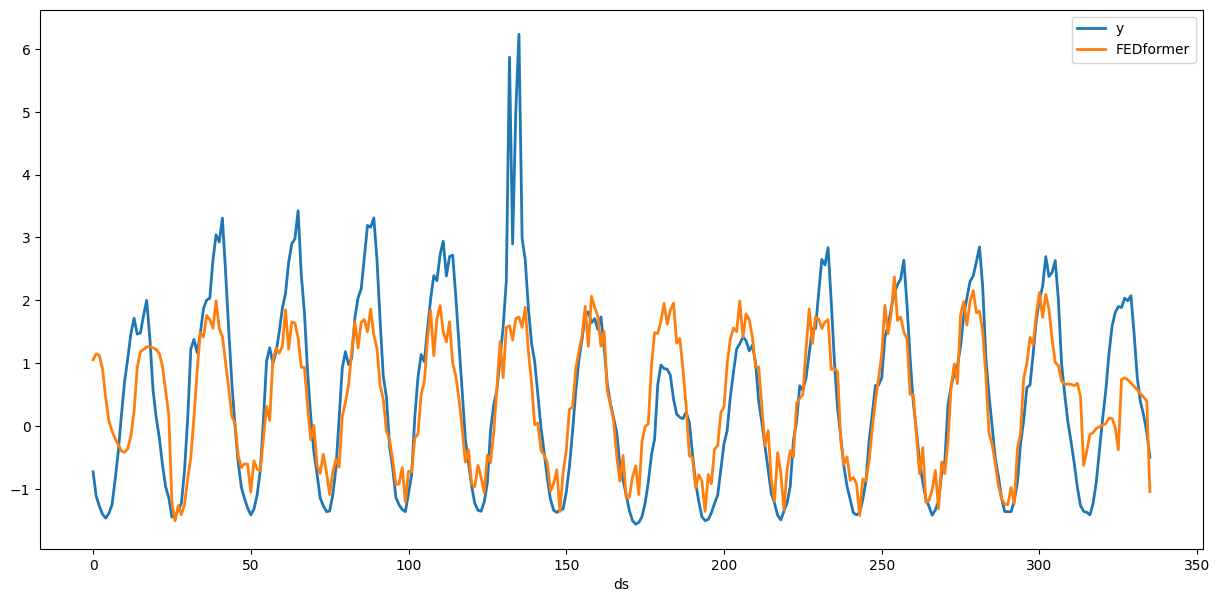

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'FEDformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,FEDformer
ds,
0,1.054739
1,1.149088
2,1.121719
3,0.904911
4,0.457345
...,...
331,0.576199
332,0.515147
333,0.460186


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_FEDformer = mae(Y_test_df['y'], forecasts['FEDformer'])
mse_FEDformer = mse(Y_test_df['y'], forecasts['FEDformer'])
print(f'N-FEDformer MAE: {mae_FEDformer:.3f}')
print(f'N-FEDformer MSE: {mse_FEDformer:.3f}')

N-FEDformer MAE: 0.651
N-FEDformer MSE: 0.781


## Horizon 720

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:16824,:]
Y_test_df = Y_df.iloc[16824:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,16824,2018-06-02 02:00:00,OT,-1.088948,-0.413043,0.333333,-0.466667,-0.083562
1,16825,2018-06-02 03:00:00,OT,-1.374312,-0.369565,0.333333,-0.466667,-0.083562
2,16826,2018-06-02 04:00:00,OT,-1.419970,-0.326087,0.333333,-0.466667,-0.083562
3,16827,2018-06-02 05:00:00,OT,-1.317239,-0.282609,0.333333,-0.466667,-0.083562
4,16828,2018-06-02 06:00:00,OT,-1.140314,-0.239130,0.333333,-0.466667,-0.083562
...,...,...,...,...,...,...,...,...
715,17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.004110
716,17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.004110
717,17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.004110
718,17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.001370


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-06-02 02:00:00,OT,-1.088948,-0.413043,0.333333,-0.466667,-0.083562
1,2018-06-02 03:00:00,OT,-1.374312,-0.369565,0.333333,-0.466667,-0.083562
2,2018-06-02 04:00:00,OT,-1.419970,-0.326087,0.333333,-0.466667,-0.083562
3,2018-06-02 05:00:00,OT,-1.317239,-0.282609,0.333333,-0.466667,-0.083562
4,2018-06-02 06:00:00,OT,-1.140314,-0.239130,0.333333,-0.466667,-0.083562
...,...,...,...,...,...,...,...
715,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.004110
716,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.004110
717,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.004110
718,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.001370


In [ ]:
horizon = 720
model = FEDformer(h=horizon, input_size=24,
               max_steps=17,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEm

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=17` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,FEDformer
unique_id,,
OT,0,1.223280
OT,1,1.350186
OT,2,1.347613
OT,3,1.258333
OT,4,0.911836
...,...,...
OT,715,0.822664
OT,716,0.778638
OT,717,0.736511


<Axes: xlabel='ds'>

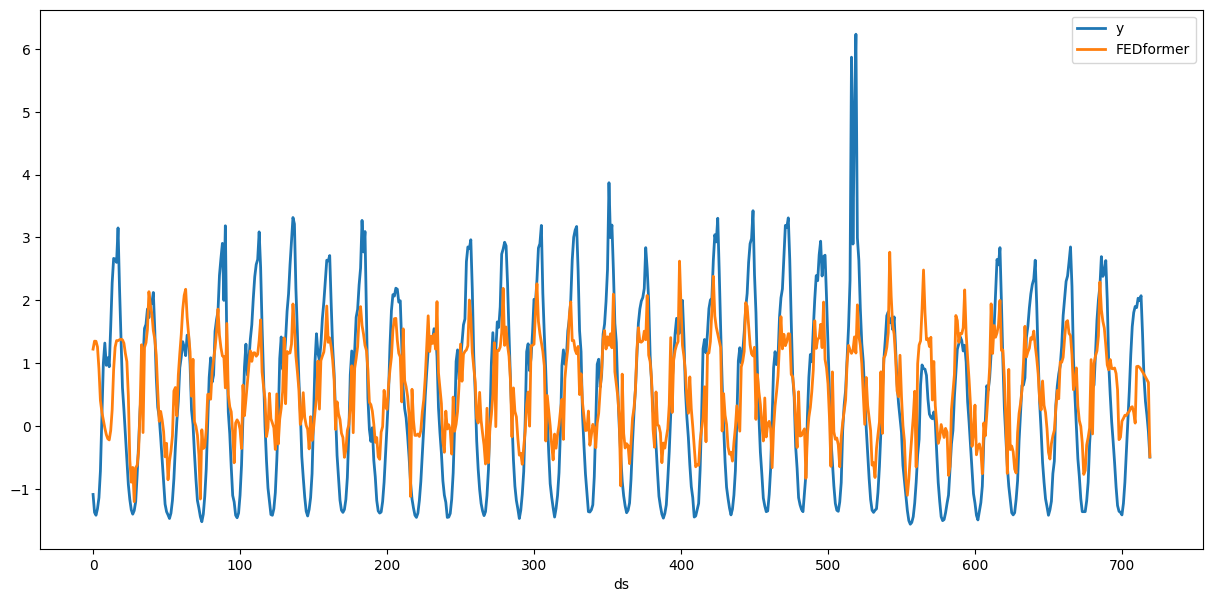

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'FEDformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,FEDformer
ds,
0,1.223280
1,1.350186
2,1.347613
3,1.258333
4,0.911836
...,...
715,0.822664
716,0.778638
717,0.736511


In [ ]:
mae_FEDformer = mae(Y_test_df['y'], forecasts['FEDformer'])
mse_FEDformer = mse(Y_test_df['y'], forecasts['FEDformer'])
print(f'FEDformer MAE: {mae_FEDformer:.3f}')
print(f'FEDformer MSE: {mse_FEDformer:.3f}')

FEDformer MAE: 0.796
FEDformer MSE: 0.943
